In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("book.csv",encoding= 'Latin1')
df.head()


,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [13]:
#dropping unrequired columns
df.drop(columns=('Unnamed: 0'),axis=1,inplace=True)


In [14]:
#renaming column names
df.rename(columns={'User.ID':'UserID',
                   "Book.Title":"BookTitle",
                   "Book.Rating":"BookRating"},inplace=True)

In [15]:
df.head()

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [17]:
df.describe()

,UserID,BookRating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [19]:
df.isnull().sum()

UserID        0
BookTitle     0
BookRating    0
dtype: int64

In [20]:
len(df)

10000

In [21]:
df.sort_values('UserID')

,UserID,BookTitle,BookRating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [22]:
len(df.UserID.unique())

2182

In [23]:
df["BookTitle"].value_counts()

BookTitle
Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: count, Length: 9659, dtype: int64

In [24]:
df["BookRating"].value_counts()

BookRating
8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: count, dtype: int64

<Axes: >

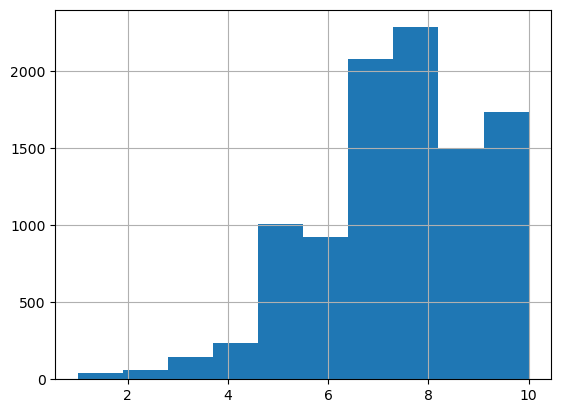

In [25]:
df["BookRating"].hist()

<Axes: xlabel='BookRating'>

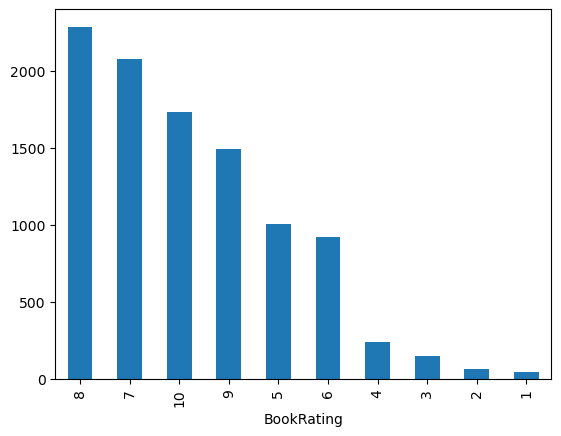

In [26]:
df.BookRating.value_counts().plot(kind='bar')



In [37]:
# Use Pivot Table to Reshape the Data
df1 = df.pivot_table(index = 'UserID', 
                     columns = 'BookTitle',
                     values = 'BookRating')
print(df1)


BookTitle   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
UserID                                                                        
8                           NaN                                         NaN   
9                           NaN                                         NaN   
10                          NaN                                         NaN   
12                          NaN                                         NaN   
14                          NaN                                         NaN   
...                         ...                                         ...   
278846                      NaN                                         NaN   
278849                      NaN                                         NaN   
278851                      NaN                                         NaN   
278852                      NaN                                         NaN   
278854                      NaN                     

In [38]:
#Impute those NaNs with 0 values
df1.fillna(0, inplace=True)

df1

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [39]:
from sklearn.metrics import pairwise_distances
df2 = 1-pairwise_distances(df1.values,metric = 'cosine')
df2

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
# diagnoal are replaced with zero
import numpy as np
np.fill_diagonal(df2, 0)
df2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
#Store the results in a dataframe
df3 = pd.DataFrame(df2)
df3

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Set the index and column names to user ids 
df3.index   = df.UserID.unique()
df3.columns = df.UserID.unique()

In [43]:
df3

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df3.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
dtype: int64

In [45]:
df[(df['UserID'] == 276729) | (df['UserID'] == 276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [46]:
# System will recommend 'Classical Mythology' to 276729 and 'Decision in Normandy' & 'Clara Callan' to276726
user_1 = df[df['UserID'] == 276729]
user_2 = df[df['UserID']  == 276726]

In [47]:
pd.merge(user_1,user_2,on='BookTitle',how='inner')
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,276729.0,Decision in Normandy,6.0,NaN,NaN
2,NaN,Classical Mythology,NaN,276726.0,5.0


In [48]:
df[(df['UserID'] == 276736) | (df['UserID'] == 276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [49]:
# System will recommend 'Classical Mythology' to 276736 and 'Flu: The Story of the Great Influenza Pandemic' to 276726
user_1 = df[df['UserID'] == 276736]
user_2 = df[df['UserID']  == 276726]


In [50]:
pd.merge(user_1,user_2,on='BookTitle', how='inner')
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276736.0,Flu: The Story of the Great Influenza Pandemic...,8.0,NaN,NaN
1,NaN,Classical Mythology,NaN,276726.0,5.0


In [51]:
df[(df['UserID'] == 276744) | (df['UserID'] == 276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
5,276744,The Kitchen God's Wife,7


In [52]:
# System will recommend 'Classical Mythology' to 276744 and 'The Kitchen God's Wife' & to276726
user_1 = df[df['UserID'] == 276744]
user_2 = df[df['UserID']  == 276726]


In [53]:
pd.merge(user_1,user_2,on='BookTitle', how='inner')
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276744.0,The Kitchen God's Wife,7.0,NaN,NaN
1,NaN,Classical Mythology,NaN,276726.0,5.0


In [54]:
df[(df['UserID'] == 276754) | (df['UserID'] == 276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
14,276754,A Second Chicken Soup for the Woman's Soul (Ch...,8


In [55]:
# System will recommend 'Classical Mythology' to 276754 and 'A Second Chicken Soup for the Woman's Soul' to 276726
user_1 = df[df['UserID'] == 276754]
user_2 = df[df['UserID']  == 276726]


In [56]:
pd.merge(user_1,user_2,on='BookTitle', how='inner')
pd.merge(user_1,user_2,on='BookTitle',how='outer')


,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276754.0,A Second Chicken Soup for the Woman's Soul (Ch...,8.0,NaN,NaN
1,NaN,Classical Mythology,NaN,276726.0,5.0


In [57]:
df[(df['UserID'] == 276745) | (df['UserID'] == 276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
6,276745,What If?: The World's Foremost Military Histor...,10


In [58]:
# System will recommend 'Classical Mythology' to 276745 and 'What If?: The World's Foremost Military Histor' to 276726
user_1 = df[df['UserID'] == 276745]
user_2 = df[df['UserID']  == 276726]


In [59]:
pd.merge(user_1,user_2,on='BookTitle', how='inner')
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276745.0,What If?: The World's Foremost Military Histor...,10.0,NaN,NaN
1,NaN,Classical Mythology,NaN,276726.0,5.0


In [60]:
df[(df['UserID']==276747) | (df['UserID']==276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8
10,276747,Nights Below Station Street,7
11,276747,Hitler's Secret Bankers: The Myth of Swiss Neu...,7


In [61]:
df[(df['UserID']==276748) | (df['UserID']==161677)]

,UserID,BookTitle,BookRating
12,276748,The Middle Stories,6
9190,161677,The Biggest Pumpkin Ever,8
9191,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9192,161677,Do You Know?,5
9193,161677,The good-by day (A Little golden book),8
9194,161677,Pooh Trick or Treat! (Little Golden Books),6
9195,161677,Cookie Monster/Cookie Tree,8
9196,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9197,161677,I Think That It is Wonderful: Featuring Jim He...,8
9198,161677,Grover's Own Alphabet,8
